![스크린샷 2024-09-02 141235.png](<attachment:스크린샷 2024-09-02 141235.png>)
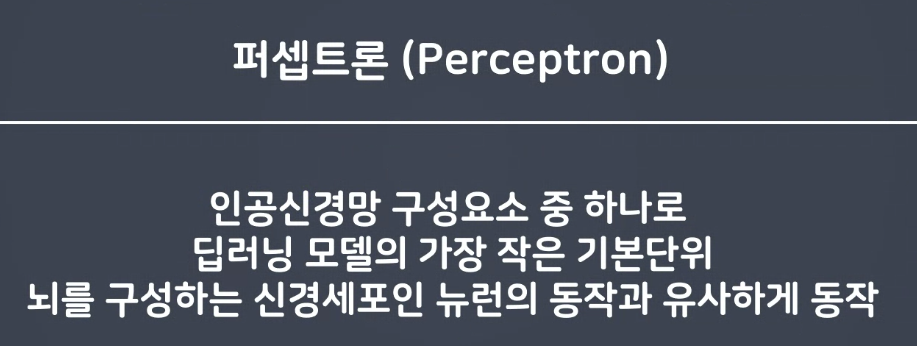

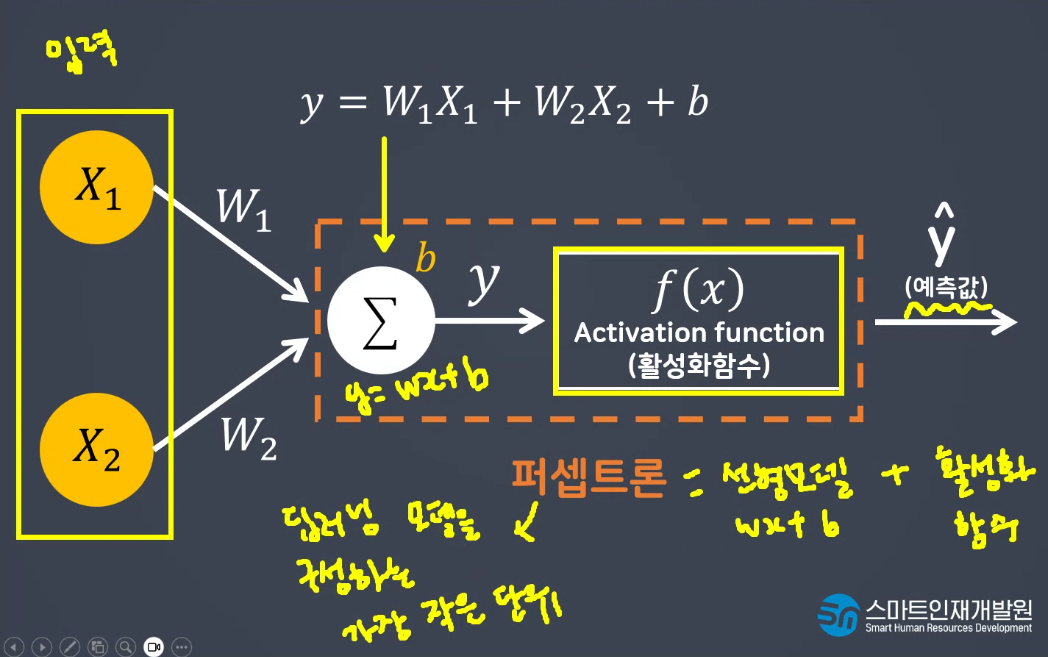

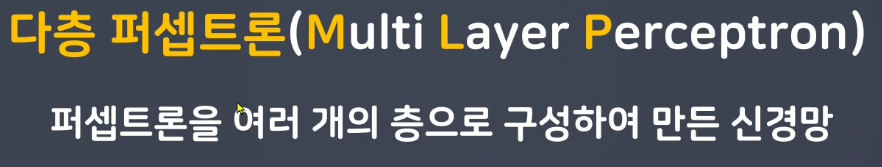

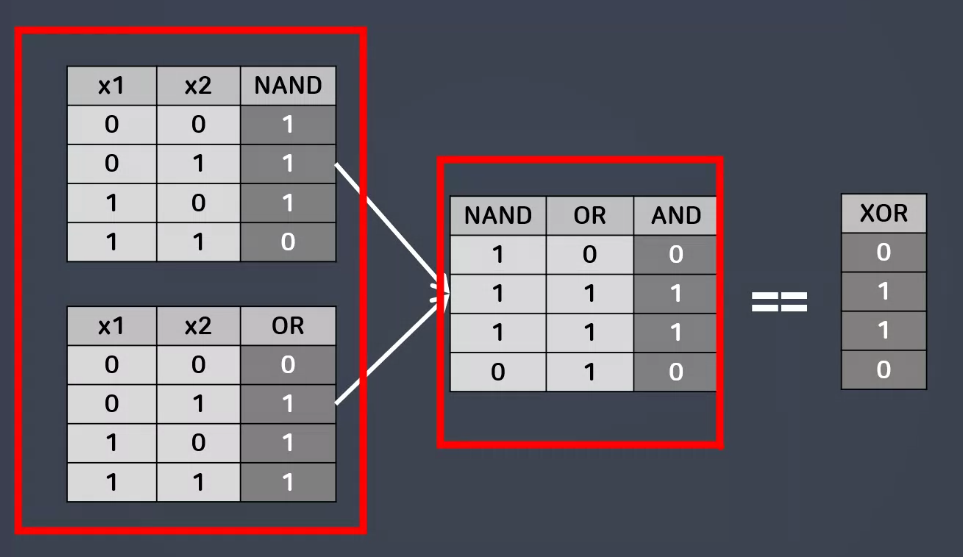

In [3]:
# 작업디텍토리 변경
%cd "C:\Users\chxss\OneDrive\Desktop\AiSchool\python\ML\DeepLearning" # vscode실행시
# %cd "/content/drive/MyDrive/colab notebooks/24.08.29딥러닝"  # 구글 코랩실행시

[WinError 2] 지정된 파일을 찾을 수 없습니다: 'C:\\Users\\chxss\\OneDrive\\Desktop\\AiSchool\\python\\ML\\DeepLearning # vscode실행시'
c:\Users\chxss\OneDrive\Desktop\AiSchool\python\ML\DeepLearning


C:\Users\chxss\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


### 학습목표
- 퍼셉트론의 개념을 이해할 수 있다
- 퍼셉트론을 간단히 구현해 보자

In [4]:
import numpy as np

In [5]:
# 활성화 함수 : step function
def activation_function(x):
  if x <= 0 :
    return 0 # 비활성화
  else :
    return 1 # 활성화

### AND 퍼셉트론 만들기

In [6]:
# AND를 구분하는 가중치가 학습되었다고 가정
def AND(x1, x2) :
  w1 = 1
  w2 = 1
  b = -1.5
  y = x1 * w1 + x2 * w2 + b # 선형모델
  return activation_function(y)

In [7]:
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))
# 둘 다 1인 경우에 1이 나오고 둘 중에 하나라도 다르면 0이 나온다

0
0
0
1


### OR 퍼셉트론 만들기

In [8]:
def OR(x1, x2):
  w1 = 1
  w2 = 1
  b = 0
  y = x1 * w1 + x2 * w2 + b # 선형모델
  return activation_function(y)

In [9]:
print(OR(0,0)) # 0
print(OR(0,1)) # 1
print(OR(1,0)) # 1
print(OR(1,1)) # 1

0
1
1
1


In [10]:
### NAND 퍼셉트론 만들기

In [11]:
def NAND(x1, x2):
  w1 = -1
  w2 = -1
  b = 1.5
  y = x1 * w1 + x2 * w2 + b # 선형모델
  return activation_function(y)

In [12]:
print(NAND(0,0)) # 1
print(NAND(0,1)) # 1
print(NAND(1,0)) # 1
print(NAND(1,1)) # 0

1
1
1
0


### XOR 해결하는 MLP 만들기

In [13]:
def XOR_MLP(x1, x2):
  a2 = NAND(x1, x2)
  a1 = OR(x1, x2)
  return AND(a1, a2)

In [14]:
print(XOR_MLP(0,0)) # 0
print(XOR_MLP(1,0)) # 1
print(XOR_MLP(0,1)) # 1
print(XOR_MLP(1,1)) # 0

0
1
1
0


### keras 활용 XOR MLP 만들기

In [15]:
# 문제
X = np.array([[0,0],
              [1,0],
              [0,1],
              [1,1]])

# 정답
y = np.array([0,1,1,0])

In [16]:
from tensorflow.keras import Sequential # 뼈대 클래스
from tensorflow.keras.layers import InputLayer # 입력층
from tensorflow.keras.layers import Dense # 퍼셉트론의 묶음 (중간층, 출력층)

In [21]:
# 1. 모델설계
xor_model = Sequential() # 뼈대 생성
xor_model.add(InputLayer(input_shape=(2,))) # 입력층
xor_model.add(Dense(units=16, activation='sigmoid')) # 중간층
xor_model.add(Dense(units=32, activation='sigmoid')) # 중간층
xor_model.add(Dense(units=8, activation='sigmoid')) # 중간층
xor_model.add(Dense(units=1, activation='sigmoid')) # 출력층

c:\Users\chxss\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [22]:
# 2. 학습 방법 및 평가 방법 설정
xor_model.compile(loss="binary_crossentropy", # 손실함수: 모델 예측의 틀린 정도를 계산
                  optimizer="adam", # 최적화 함수 : 오차를 기반으로 가중치를 최적화한다
                  metrics=["accuracy"]) # 평가지표 : 정확도

In [23]:
xor_model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step - accuracy: 0.5000 - loss: 0.6962
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5000 - loss: 0.6953
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5000 - loss: 0.6946
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5000 - loss: 0.6940
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5000 - loss: 0.6936
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - loss: 0.6934
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5000 - loss: 0.6933
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7500 - loss: 0.6932
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5000 - loss: 0.6933
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - loss: 0.6934
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5000 - loss: 0.6935
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy

In [24]:
# 4. 모델 예측
xor_model.predict(np.array([[0,0],[1,0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[0.00198918],
       [0.9959375 ]], dtype=float32)